## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Libraries">Importing Libraries</a></li>
<li><a href="#Data">Get the Data</a></li>
<li><a href="#EDA">Data Exploration and Visualization</a></li>

<a id = 'Libraries'></a>
## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

<a id = 'Data'></a>
## Get the Data

In [2]:
adult_df = pd.read_csv('A:\\Data Analysis Jupyter\\Adult-Census\\adult.csv')
print("Number of Observations in dataset:", adult_df.shape)

adult_df.head()

Number of Observations in dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<a id = 'EDA'></a>
## Data Exploration and Visualization

In [5]:
#Separate categorical and numberical columns
cat_col = adult_df.dtypes[adult_df.dtypes == 'object'] # if its type object
num_col = adult_df.dtypes[adult_df.dtypes != 'object'] # if its not object

In [6]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['Total','Percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  Total   Percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              Total   Percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

`native.country ,occupation , workclass` has unknown values represented by `?`.

In [7]:
edit_cols = ['native.country','occupation','workclass']
# Replace '?' with 'unknown'
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [8]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


Since 9th, 10th, 11th, 12th come under high school grad, group them in one attribute i.e **'HS-Grad'**. Similarly group 1st-4th, 5th-6th,7th-8th in **'Elementary-school'.**

In [9]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-Grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'Elementary-School',inplace = True)

adult_df['education'].value_counts()

HS-Grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
Elementary-School     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

Similarly, group categories for `marital-status` into one single to reduce feature complexity.

In [10]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [11]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()



Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

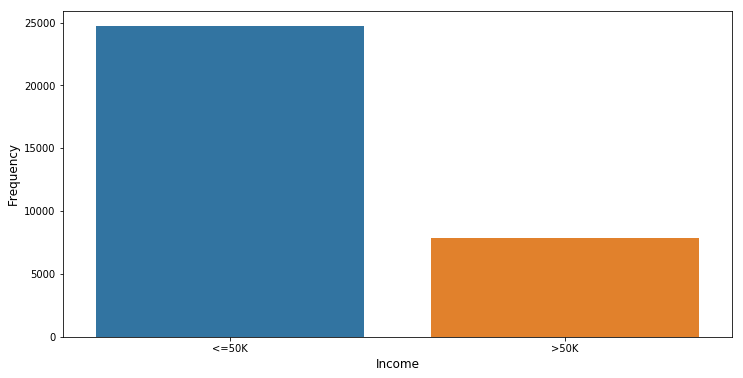

In [12]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

- Dataset clearly shows nearly 25000 people earn *(less than) <=50K* which are 75% and remainng 25% earns *more than >50K.*


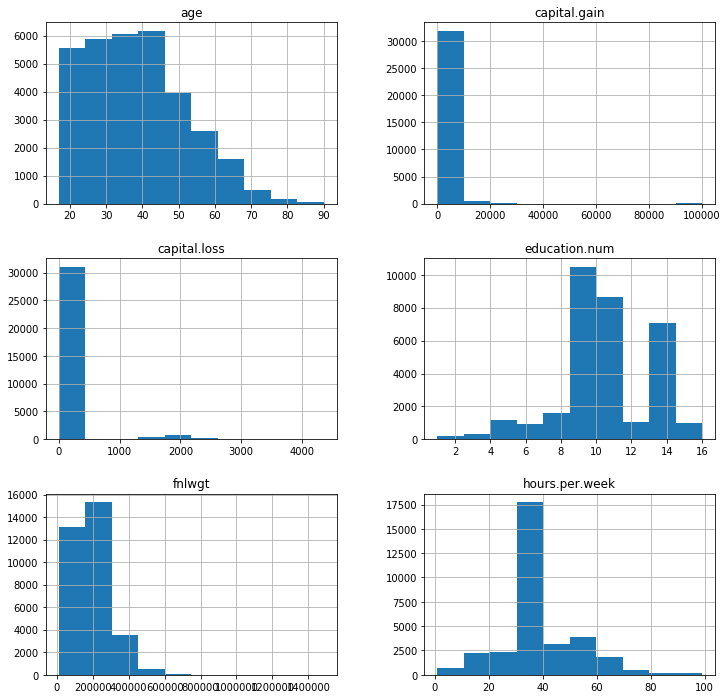

In [13]:
adult_df[list(num_col.index)].hist(figsize = (12,12));

- `age`: People from age group of **18 to 50** can be seen at a greater extent.
- `hours per week`: Generally people can be seen working for **30 hours to 40 hours per week**.
- `education`: People above **8th grade** are present in greater numbers.

Dataset is highly skewed so it needs to be scaled for better performance.


In [14]:
capital_loss_df = adult_df[adult_df['capital.loss']>0]
capital_gain_df = adult_df[adult_df['capital.gain']>0]

print(f"Number of observations having CAPITAL LOSS above median value: {capital_loss_df.shape}\nNumber of observations in CAPITAL GAIN dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(adult_df.loc[adult_df['capital.gain'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(adult_df.loc[adult_df['capital.loss'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")

Number of observations having CAPITAL LOSS above median value: (1519, 15)
Number of observations in CAPITAL GAIN dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [15]:
capital_gain_0= adult_df[adult_df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = adult_df[adult_df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
362           1977             0
840           1887             0
1262          1602             0
660           1902             0
380           1977             0
      capital.loss  capital.gain
2704             0          7298
3986             0          2202
3452             0          3908
3029             0          5178
2616             0          7688


- People are having capital gain equal to zero.

Possibilities for capital gain and capital loss

- Both capital gain and capital loss can be zero
- If capital.gain is zero there is possibility of capital loss being high or above zero.
- If capital loss is zero there is possibility of capital.gain being high or above zero.

In [16]:
# When capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)][col].value_counts())
    

Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: workclass, dtype: int64
================================education=================================
HS-Grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
Elementary-School     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: education, dtype: int64
================================marital.status=================================
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: marital.status, dtype: int64
================================occupation=================================
Craft-repair   

- So 88% of people in our dataset has capital gain and loss = 0
- This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.
- Workclass contains unknown values.

In [17]:
adult_df.loc[adult_df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


- Maximum value of capital gain is 99999 which is far above 75% quartile range.This is definitely an outlier. Lets try and understand more about this maximum value of 99999.

In [18]:
print(f"Number of observations having capital gain of 99999:{adult_df.loc[adult_df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {adult_df.loc[adult_df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts: >50K    159
Name: income, dtype: int64


- So their income is greater than 50K.

In [19]:
adult_df.loc[adult_df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [20]:
print(f"Number of observations having capital loss of 4356:{adult_df.loc[adult_df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_df.loc[adult_df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
>50K     658
<=50K    277
Name: income, dtype: int64


- People with Income above 50K are having capital loss above mean value.
- It shows there are some other parameters affecting their loss irrespective of high salary.

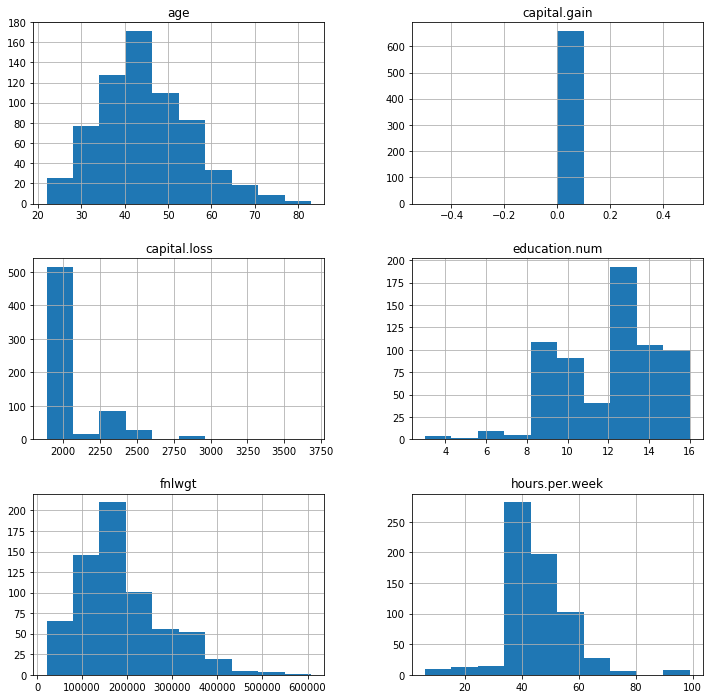

In [21]:
# Understand characteristics of people having capital loss greater than mean value and having income greater than 50K
adult_df[(adult_df['capital.loss'] >= 1871) & (adult_df['income'] == '>50K')].hist(figsize = (12,12));

- Education and hours per week are significantaly high.
- There are some other factors affecting their loss other than the above.


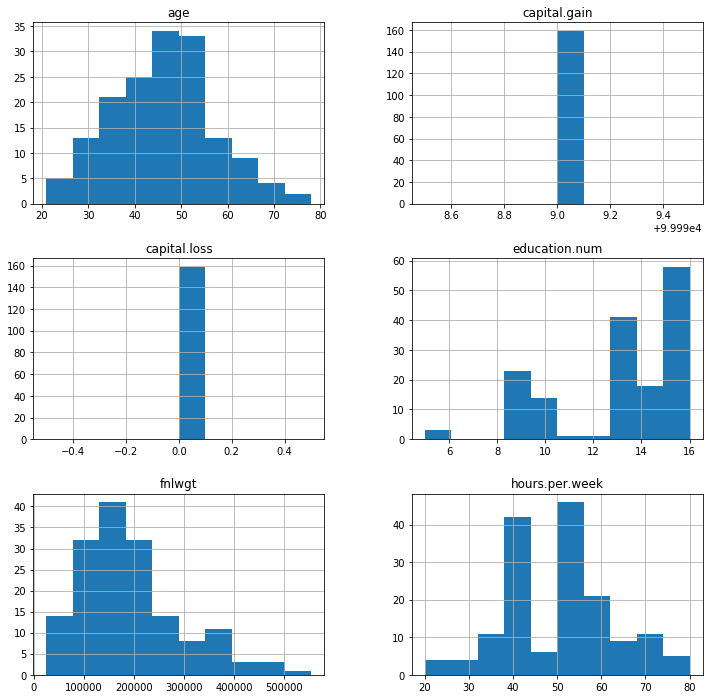

In [22]:
adult_df.loc[adult_df['capital.gain'] == 99999,:].hist(figsize = (12,12));

- Age group and hours per week are fairly distributed for capital gain of 99999.

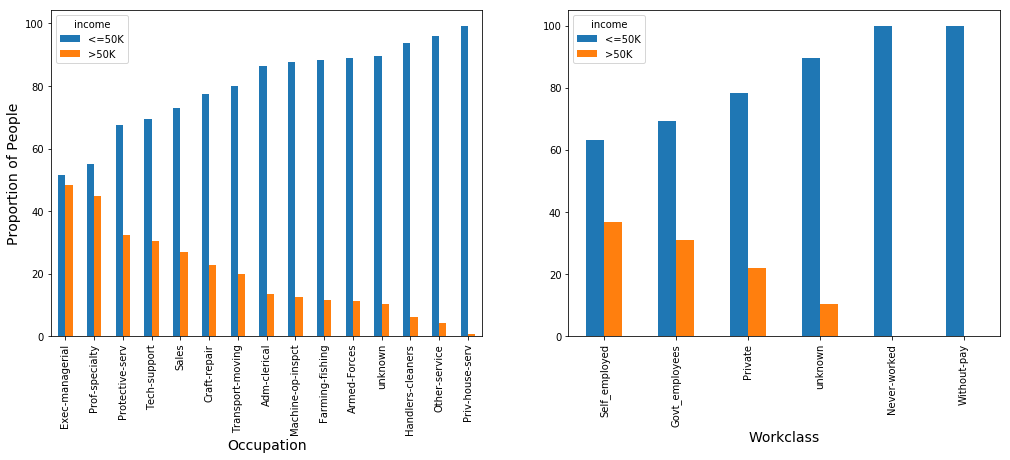

In [23]:
table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);




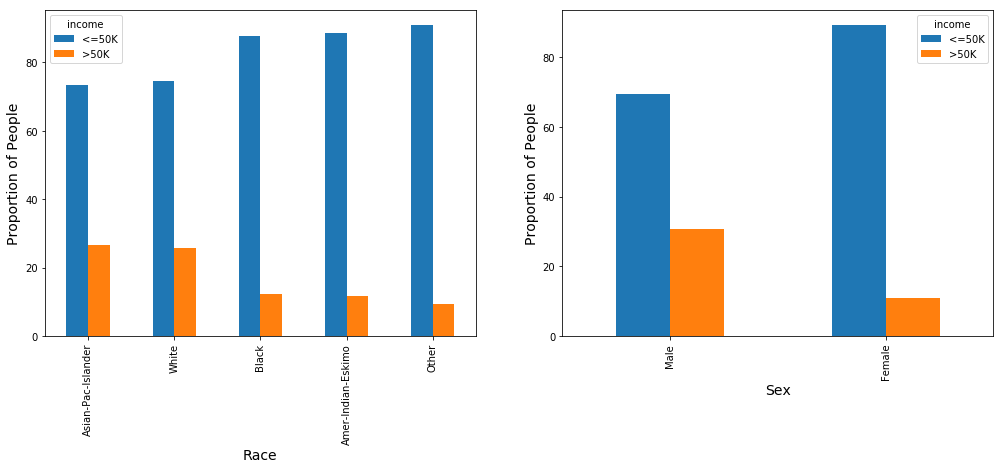

In [24]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

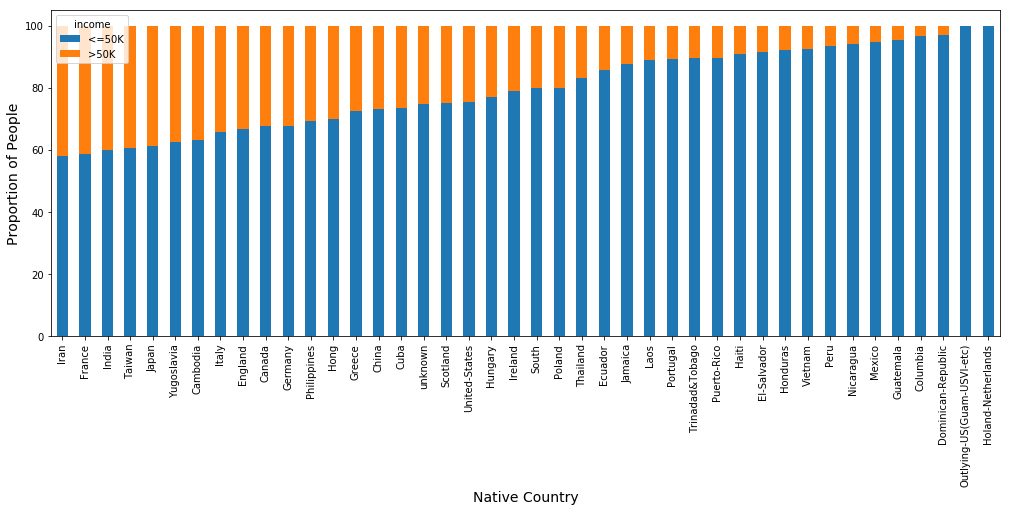

In [25]:
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary
1. Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K 
2. Race:- White and asain-pac-Islander earn salary more than 50K
3. marital_status :- 41% of married people seem to earn salary greater than 50K.
4. People having degree doctorate,prof-school,masters are making salary more than 50K.
5. Out of all the workclass only 59% self employed people are making salary more than 50K.
6. If I check by occupation, Proportion of people making salary less than 50K is higher.

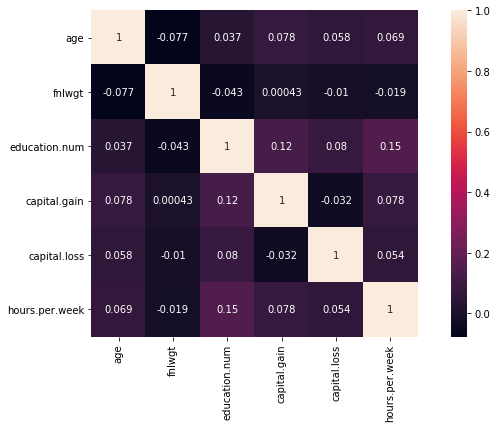

In [26]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult_df[list(num_col.index)].corr(),annot = True,square = True);

strong correlation.

- Age and Hours per week
- capital gain and hours per week

Moderate Correlation

- capital loss and age

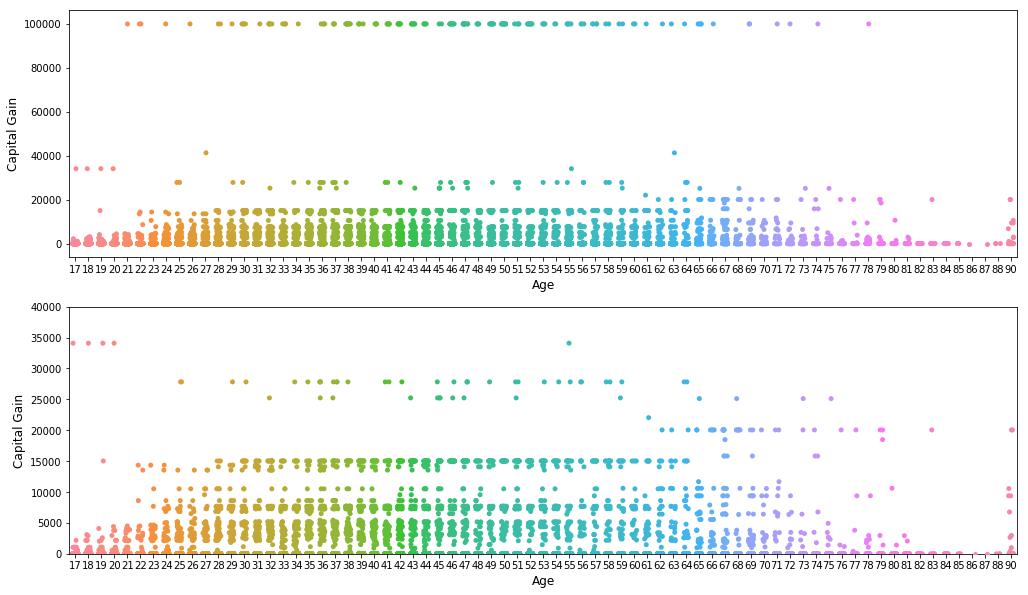

In [27]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

- Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
- Age 90 doesn't follow the pattern.
- Capital.gain of 99999 is a outlier

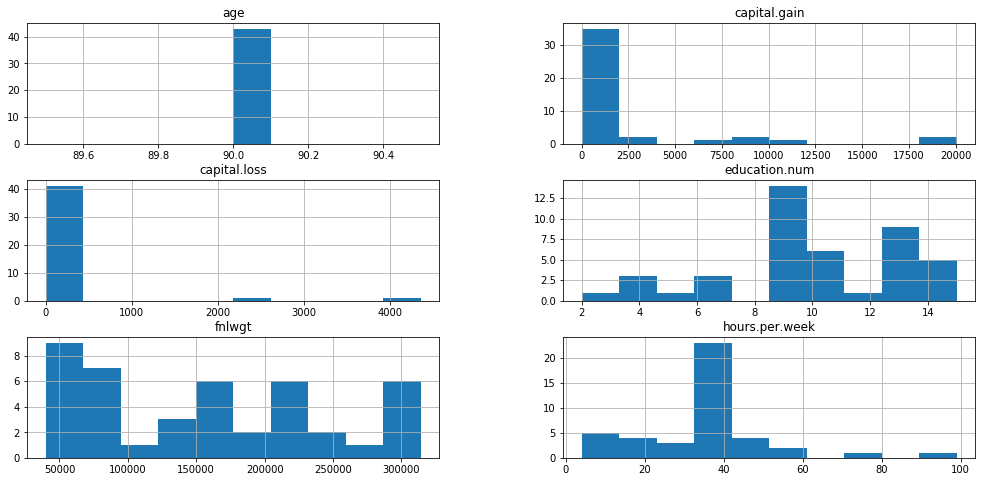

In [28]:
adult_df[adult_df['age'] == 90].hist(figsize = (17,8));

In [29]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue
   

=======================================workclass=========================
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: workclass, dtype: int64
=======================================occupation=========================
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Craft-repair         3
Machine-op-inspct    3
Sales                3
Transport-moving     1
Protective-serv      1
Handlers-cleaners    1
Farming-fishing      1
Name: occupation, dtype: int64
=======================================income=========================
<=50K    35
>50K      8
Name: income, dtype: int64


- At age 90 people can't work in goverment or private sectors 
- Morever it shows the peak working hours as 40.

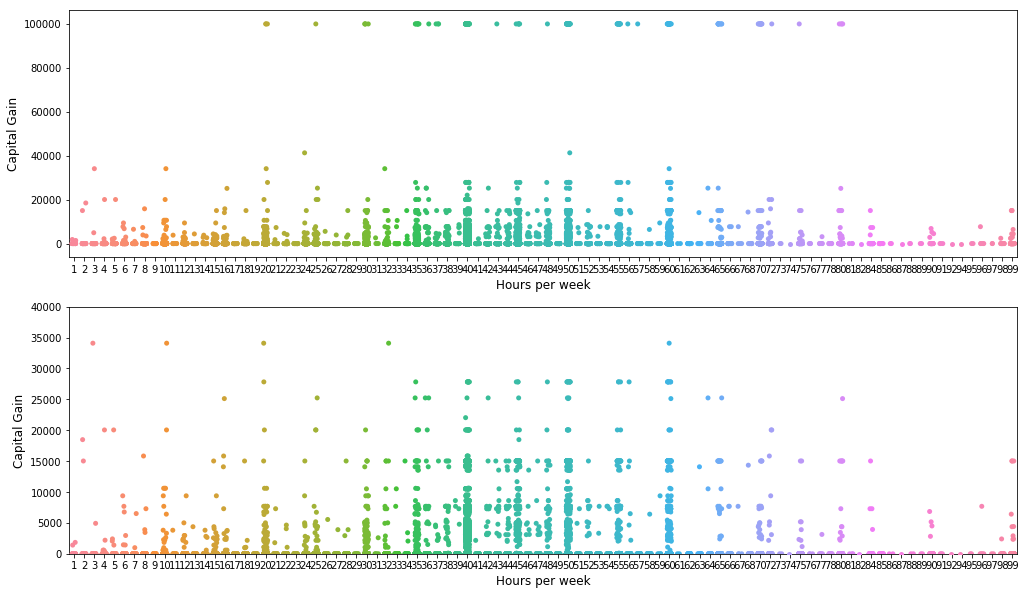

In [30]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

- Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.
- There are few people working for 99 hours per week but doesn't seem to  make high capital gain. Conversely people working below 40 hours per week are making high capital gains.

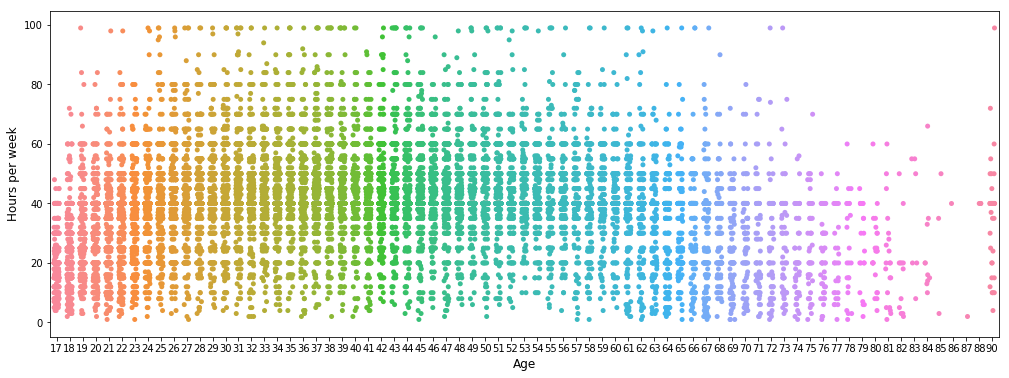

In [31]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','hours.per.week', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

`Outliers Summary`

- Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
- Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is again unreasonable.
- Few people working for 99 hours per week.

`Feature Removal`

- Education num and education are giving similar information 
- Relationship and marital status imply similar information.Hence keeping only one of the two.

<a id='algo prepare'></a>

## Preparing Data for ML Algorithms

In [32]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [33]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])


Number of people working for 99 hours per week: 85


In [34]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,1.000000,0.0,1.0,0.397959,0.043987
1,0.890411,0.0,1.0,0.173469,0.081896
2,0.671233,0.0,1.0,0.397959,0.118021


In [36]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])



In [37]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

(32561, 5)

In [38]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [39]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

(32561, 80)